In [1]:
import json
import cs_vqe_classes.cs_vqe_circuit as cs_circ
import utils.plotting_tools as plot
import utils.qonversion_tools as qonvert
from utils.molecule_tools import get_molecule
from utils.cs_vqe_tools import greedy_dfs
from matplotlib import pyplot as plt
import numpy as np
from qiskit.aqua.components.optimizers import IMFIL, NELDER_MEAD, POWELL, NFT, SPSA, SLSQP, SNOBFIT, COBYLA

/home/tim/anaconda3/lib/python3.7/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')
/home/tim/anaconda3/lib/python3.7/site-packages/qiskit/aqua/components/optimizers/optimizer.py:50: DeprecationWarning: The package qiskit.aqua.components.optimizers is deprecated. It was moved/refactored to qiskit.algorithms.optimizers (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  'qiskit.algorithms.optimizers', 'qiskit-terra')


In [2]:
with open('data/model_data.json', 'r') as json_file:
    model_data = json.load(json_file)
    
model_data.keys()

dict_keys(['H2_3-21G_SINGLET', 'H6_STO-3G_SINGLET', 'H2_6-31G_SINGLET', 'H2_6-311G_SINGLET', 'H3+_STO-3G_SINGLET', 'H3+_3-21G_SINGLET', 'H3+_STO-3G_SINGLET_alt', 'HeH+_3-21G_SINGLET', 'HeH+_3-21G_SINGLET_alt', 'HeH+_6-311G_SINGLET', 'H2O_STO-3G_SINGLET', 'H2O_STO-3G_SINGLET_alt', 'BeH+_STO-3G_SINGLET', 'LiH_STO-3G_SINGLET', 'CH+_STO-3G_SINGLET', 'HF_STO-3G_SINGLET', 'B+_STO-3G_SINGLET', 'N+_STO-3G_SINGLET', 'OH+_STO-3G_SINGLET', 'CH2_STO-3G_SINGLET', 'BeH2_STO-3G_SINGLET', 'Be_STO-3G_SINGLET', 'C_STO-3G_SINGLET', 'NH_STO-3G_SINGLET', 'F+_STO-3G_SINGLET', 'Li+_STO-3G_SINGLET', 'BH_STO-3G_SINGLET', 'NeH+_STO-3G_SINGLET', 'NH2+_STO-3G_SINGLET', 'BH2+_STO-3G_SINGLET'])

In [3]:
speciesname = "LiH_STO-3G_SINGLET"
molecule    = model_data[speciesname]

ham         = molecule['ham']
uccsd       = molecule['uccsd']
hf_config   = molecule['hf_config']
num_qubits  = molecule['num_qubits']
terms_noncon= molecule['terms_noncon']
num_tapered = molecule['num_tapered']
print(num_tapered+num_qubits, num_qubits)

16 8


LiH_STO-3G_SINGLET reaches chemical accuracy for 4-qubit CS-VQE


/home/tim/anaconda3/lib/python3.7/site-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1268: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  RuntimeWarning)


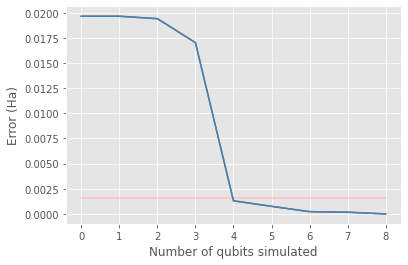

In [4]:
mol_circ = cs_circ.cs_vqe_circuit(hamiltonian = ham,
                                  terms_noncon= terms_noncon,
                                  num_qubits  = num_qubits,
                                  hf_config   = hf_config)

num_sim_q = mol_circ.chem_acc_num_q
print('%s reaches chemical accuracy for %i-qubit CS-VQE' % (speciesname, num_sim_q))
mol_circ.plot_cs_vqe_errors()

In [8]:
anz_ops = mol_circ.sufficient_anz_terms(uccsd)

Testing operator 1/388
Testing operator 2/388
Testing operator 3/388
Testing operator 4/388
Testing operator 5/388
Testing operator 6/388
Testing operator 7/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 8/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 9/388
Testing operator 10/388
Testing operator 11/388
Testing operator 12/388
Testing operator 13/388
Testing operator 14/388
Testing operator 15/388
Testing operator 16/388
Testing operator 17/388
Testing operator 18/388
Testing operator 19/388
Testing operator 20/388
Testing operator 21/388
Testing operator 22/388
Testing operator 23/388
Testing operator 24/388
Testing operator 25/388
Testing operator 26/388
Testing operator 27/388
Testing operator 28/388
Testing operator 29/388
Testing operator 30/388
Testing operator 31/388
Testing operator 32/388
Testing operator 33/388
Testing operator 34/388
Testing operator 35/388
Testing operator 36/388
Testing opera

Testing operator 239/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 240/388
Testing operator 241/388
Testing operator 242/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 243/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 244/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 245/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 246/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 247/388
Testing operator 248/388
Testing operator 249/388
Testing operator 250/388
Testing operator 251/388
Testing operator 252/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 253/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 254/388
Testing operator 255/388
*   Performing 4-qubit CS-VQE over qubit positi

Testing operator 148/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 149/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 150/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 152/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 153/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 154/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 155/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 156/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 157/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 159/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 160/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...

Testing operator 160/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 161/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 162/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 163/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 165/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 166/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 167/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 168/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 170/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 235/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 238/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...

Testing operator 238/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 239/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 242/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 243/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 244/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 245/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 246/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 252/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 253/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 255/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 258/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...

Testing operator 260/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 261/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 262/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 267/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 270/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 272/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 273/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 275/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 276/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 277/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 278/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...

Testing operator 293/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 294/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 297/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 298/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 358/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 359/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 360/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 361/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 362/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 363/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 364/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...

Testing operator 385/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 386/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 387/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 388/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
['YXIIIIXX', 'IIIIYZXI', 'XZIIZYIX', 'IYIIYIIX', 'IIIIYYYX', 'IYIIXIIY', 'IIIIIXZY']
------------------------------------------------------------
Error with 7 operator(s) in Ansatz =  0.0019093548096247304
------------------------------------------------------------
Testing operator 7/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 8/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 79/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 80/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing ope

Testing operator 123/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 130/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 136/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 141/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 147/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 148/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 149/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 150/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 152/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 153/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 154/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...

Testing operator 160/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 161/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 162/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 163/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 165/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 166/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 167/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 168/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 170/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 235/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 238/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...

Testing operator 252/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 253/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 255/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 258/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 259/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 261/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 262/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 267/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 270/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 272/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 273/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...

Testing operator 298/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 358/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 359/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 360/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 361/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 362/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 363/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 364/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 381/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 383/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 385/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...

Testing operator 79/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 80/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 114/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 117/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 119/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 122/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 123/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 130/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 136/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 141/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 147/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
T

Testing operator 159/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 160/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 161/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 162/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 163/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 165/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 166/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 167/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 168/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 170/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 235/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...

Testing operator 262/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 267/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 272/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 273/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 277/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 278/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 282/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 293/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 294/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 297/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 298/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...

['YXIIIIXX', 'IIIIYZXI', 'XZIIZYIX', 'IYIIYIIX', 'IIIIYYYX', 'IYIIXIIY', 'IIIIIXZY', 'XZIIZZYI', 'IIIIXYXX', 'IIIIYYXY', 'IXIIXIIY', 'IIIIXYYY', 'ZYZZYIZY', 'IIIIIYZX', 'IXIIXIIX', 'YZIIYIYZ', 'YZZZYIYZ']
------------------------------------------------------------
Error with 17 operator(s) in Ansatz =  0.0016240136350482715
------------------------------------------------------------
Testing operator 7/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 8/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 79/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 80/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 114/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 117/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 119/388
*   Performing 4-qubit CS-VQE over qubit positi

Testing operator 155/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 156/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 157/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 159/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 160/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 161/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 162/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 163/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 165/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 167/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 168/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...

Testing operator 277/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 278/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 282/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 293/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 294/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 297/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 298/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 358/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 359/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 360/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 361/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...

Testing operator 80/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 114/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 119/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 122/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 123/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 130/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 141/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 147/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 148/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 149/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 150/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...


Testing operator 245/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 252/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 253/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 255/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 258/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 261/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 262/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 267/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 272/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 273/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 277/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...

Testing operator 8/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 79/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 80/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 114/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 119/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 122/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 123/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 130/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 141/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 147/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 148/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Tes

Testing operator 253/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 258/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 261/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 262/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 267/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 272/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 273/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 277/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 278/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 282/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 293/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...

Testing operator 8/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 79/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 80/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 114/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 119/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 122/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 123/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 130/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 141/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 147/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 148/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Tes

Testing operator 273/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 277/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 278/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 282/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 293/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 294/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 297/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 298/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 358/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 359/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 360/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...

Testing operator 147/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 148/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 149/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 150/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 152/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 153/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 154/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 155/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 156/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 157/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 159/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...

Testing operator 363/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 364/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 381/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 383/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 385/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
Testing operator 387/388
*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...
['YXIIIIXX', 'IIIIYZXI', 'XZIIZYIX', 'IYIIYIIX', 'IIIIYYYX', 'IYIIXIIY', 'IIIIIXZY', 'XZIIZZYI', 'IIIIXYXX', 'IIIIYYXY', 'IXIIXIIY', 'IIIIXYYY', 'ZYZZYIZY', 'IIIIIYZX', 'IXIIXIIX', 'YZIIYIYZ', 'YZZZYIYZ', 'IYIIXIIX', 'YIIIIIXZ', 'YIIIXZYI', 'YZIIXIYZ', 'YZZIYIYZ', 'YZIZYIYZ', 'ZXIIIIIY', 'ZXIIXZZX', 'IXIIYIIY', 'IXIIYIIX', 'IYIIYIIY', 'IYIIZZZX', 'YIIIYZXI', 'YZIIZXIY', 'YZIIXIXZ']
------------------------------------------------------------
Error wi

KeyboardInterrupt: 

In [9]:
#import random
ham_red = mol_circ.ham_reduced[num_sim_q]
#anz_indices = [random.randint(0, len(uccsd.keys())) for i in range(1)]
#print(anz_indices)
#for B+ anz_ops = ['XIZXX', 'IYZXX']
#for Be anz_ops = ['ZYZXX', 'IIYXX', 'XIIYX', 'IYZXX']
#for C anz_ops = ['ZXYII', 'XZZXX', 'XIZYX']
#for LiH anz_ops = ['YXIIIIXX', 'IIIIYZXI', 'XZIIZYIX', 'IYIIYIIX', 'IIIIYYYX'] #doesn't quite hit qa
anz_ops = ['YXIIIIXX']
#for HF  anz_ops = ['XYIIXXII', 'XYIIIIXX', 'IYIIZXII', 'YYIIZZYX', 'IYIIZZZX', 'YYIIIIYX', 'XXIIYXII', 'YXIIYYII']
#for OH+ anz_ops = 
#anz_indices = [49, 97, 71, 72] #for C
#anz = {op:uccsd[op] for op in [list(uccsd.keys())[i] for i in anz_indices]}
#anz = uccsd
#anz_ops = ['ZXIYX', 'XZZXX', 'YZZXX']
anz = {op:uccsd[op] for op in anz_ops}

#anz=uccsd
anz_red = mol_circ.project_anz_terms_alt(anz_terms=anz, num_sim_q = num_sim_q)
ham_red = mol_circ.ham_reduced[num_sim_q]
qc = mol_circ.build_circuit(anz, num_sim_q)
init_params = mol_circ.init_param
bounds = np.array([(p-np.pi, p+np.pi) for p in init_params])
qc.parameter_bounds = bounds

print('%i-qubit reduced Hamiltonian:'%num_sim_q, ham_red, '\n')
print('%i-qubit reduced Ansatz:'%num_sim_q, anz_red, '\n')
print('Corresponding reduced Ansatz circuit:')
#qc.draw(output='mpl')

4-qubit reduced Hamiltonian: {'IIII': -6.995891462353969, 'ZIII': -0.36527194504081434, 'IZII': -0.36527194532035623, 'ZZII': 0.11384398820287055, 'ZIZI': 0.21189016294556204, 'IIZI': -0.09275797343514047, 'ZZZI': -0.06044027469510545, 'IZZI': 0.11395339246515192, 'IZIZ': 0.21189016274192166, 'ZZIZ': -0.06044027505833438, 'IIIZ': -0.092757974046712, 'ZIIZ': 0.11395339246515192, 'ZZZZ': 0.08460154575523679, 'IZZZ': -0.05628953731783007, 'ZIZZ': -0.056289536789945326, 'IIZZ': 0.12274418444186225, 'XIII': 0.019087794288175943, 'YIII': 0.0034088175184034996, 'XIZI': 0.01908779473925149, 'YIZI': 0.003408817518403497, 'XIZZ': 0.012580191461126513, 'YIZZ': 0.002246649190381085, 'XZZZ': 0.008862305472713772, 'YZZZ': 0.001582685849849982, 'XZZI': 0.010782056877237234, 'YZZI': 0.0019255270988385593, 'YZII': 0.0019255270988385756, 'XZII': 0.010782056792431013, 'YZIZ': 0.0015826858498499954, 'YIIZ': 0.002246649190381104, 'XZIZ': 0.008862305146446649, 'XIIZ': 0.012580191251511942, 'ZXZZ': 0.0090025

# Performing the simulation *without* noise

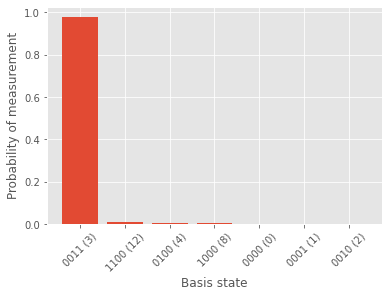

*   Performing 4-qubit CS-VQE over qubit positions 7, 2, 1, 0 ...


/home/tim/anaconda3/lib/python3.7/site-packages/qiskit/aqua/components/optimizers/spsa.py:237: DeprecationWarning: The variable qiskit.aqua.aqua_globals is deprecated. It was moved/refactored to qiskit.utils.algorithm_globals (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  delta = 2 * aqua_globals.random.integers(2, size=np.shape(initial_theta)[0]) - 1


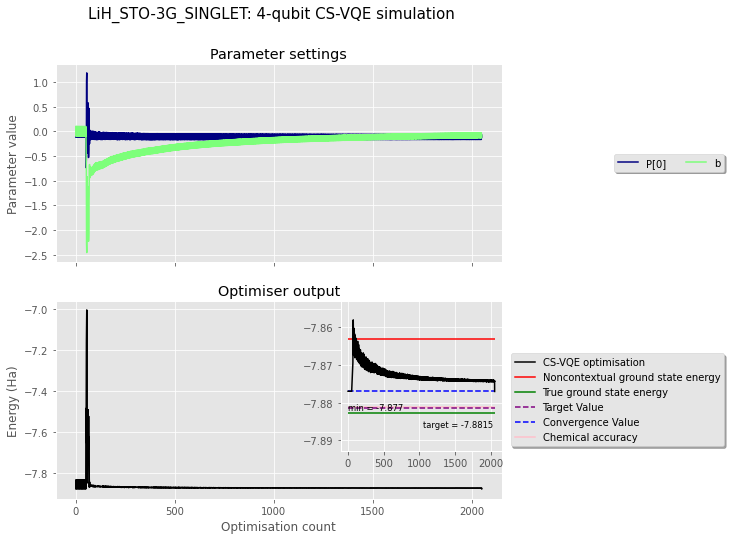

In [13]:
cs_vqe_results = mol_circ.CS_VQE(anz_terms=anz, 
                                 num_sim_q=num_sim_q, 
                                 optimizer=SPSA(maxiter=1000), 
                                 param_bound=np.pi,
                                 noise=False,
                                show_amps=True)

title = '%s: %i-qubit CS-VQE simulation' % (speciesname, num_sim_q)
fig = plot.plot_parameter_settings(cs_vqe_results, title=title)

In [11]:
#param_hist = [config for param, config in cs_vqe_results['params'].items()]
#init_params = np.array(list(zip(*param_hist))[-1])

# Performing the simulation *with* noise

The noise model used below emulates IBM's 5-qubit Vigo device, derived from real-life performance data

In [12]:
from qiskit import IBMQ
from utils.circuit_execution_tools import remote_circuit_execution
from matplotlib import pyplot as plt
plt.style.use('ggplot')
with open('data/token.txt', 'r') as file:
    TOKEN = file.read()
IBMQ.save_account(TOKEN, overwrite=True)
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [19]:
#data, raw_data = remote_circuit_execution(mol_circ=mol_circ, num_sim_q=num_sim_q, anz_op=anz, maxiter=150, qfi_resamples=150, zero_params=True)

In [20]:
#fig = plot.plot_parameter_settings_alt(data, log_error=True)

In [18]:
provider = IBMQ.get_provider(hub='ibm-q',group='open',project='main')
backends = [b.name() for b in provider.backends() if b.configuration().num_qubits==5]
backends

['ibmq_santiago',
 'ibmq_bogota',
 'ibmq_lima',
 'ibmq_belem',
 'ibmq_quito',
 'ibmq_manila']

In [28]:
remote_circuit_execution(mol_circ=mol_circ, num_sim_q=num_sim_q, anz_op=anz, maxiter=250, qfi_resamples=100, zero_params=True)#, backend="ibmq_belem")

({'truegs': -7.882762230972028,
  'target': -7.881461331561339,
  'noncon': -7.863115321805144,
  'optmzr': 'QN-SPSA',
  'backnd': 'ibmq_qasm_simulator',
  'numfev': [1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   57,
   58,
   59,
   60,
   61,
   62,
   63,
   64,
   65,
   66,
   67,
   68,
   69,
   70,
   71,
   72,
   73,
   74,
   75,
   76,
   77,
   78,
   79,
   80,
   81,
   82,
   83,
   84,
   85,
   86,
   87,
   88,
   89,
   90,
   91,
   92,
   93,
   94,
   95,
   96,
   97,
   98,
   99,
   100,
   101,
   102,
   103,
   104,
   105,
   106,
   107,
   108,
   109,
   110,
   111,
   112,
   113,
   114,
   115,
   116,
   117,
   118,


In [18]:
cs_vqe_results['result']

-7.877029837040657